In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torchvision.datasets import MNIST, FashionMNIST
dataset_root = "./data/fashion_pt" 
Dataset = FashionMNIST
#dataset_root = "data/MNIST_pt/"
#Dataset = MNIST

In [2]:
batch_size = 64

transform = transforms.ToTensor()
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = Dataset(dataset_root, download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(labels.min(), labels.max(), len(labels))

tensor(0) tensor(9) 64


1.0 0.0 0.14535315 0.2858355 (1, 28, 28)
Sneaker


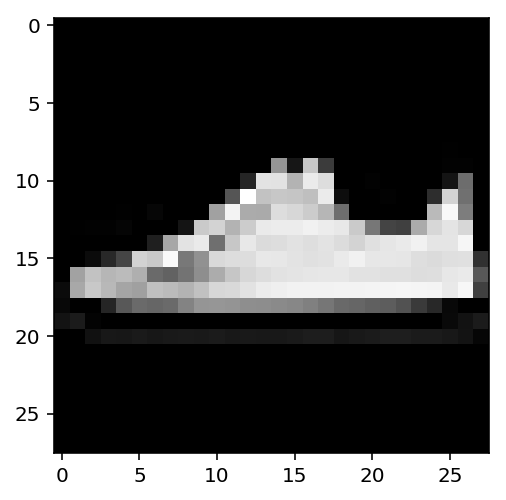

In [4]:
idx = 2
img = images[idx].numpy()
img_class = classes[labels[idx]]
print(img.max(), img.min(), img.mean(), img.std(), img.shape)
plt.imshow(img.squeeze(), cmap='Greys_r')
print(img_class)

In [5]:
testset = Dataset(dataset_root, download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [6]:
from torch import nn
from torch import optim
import torch.nn.functional as F

In [8]:
input_dim = 28 * 28

class LinearNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.softmax(x)
        
model = LinearNN()
model

LinearNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)